In [1]:
#import the requred libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
#if it will give any wanrting then it will be ignored
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/home/osboxes/Desktop/Fall_Deteciton_Dataset.csv")
df

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,Falling,4722.92,4019.64,-1600.00,13.0,79.0,317
1,Sitting,4059.12,2191.03,-1146.08,20.0,54.0,165
2,Sitting,4773.56,2787.99,-1263.38,46.0,67.0,224
3,Cramps,8271.27,9545.98,-2848.93,26.0,138.0,554
4,Cramps,7102.16,14148.80,-2381.15,85.0,120.0,809
...,...,...,...,...,...,...,...
16377,Cramps,9280.68,11417.00,-3021.64,36.0,156.0,654
16378,Falling,8479.69,9455.54,-2932.85,17.0,138.0,554
16379,Sitting,8872.53,27449.90,-2870.00,33.0,156.0,1364
16380,Cramps,7738.99,26466.40,-2920.24,97.0,156.0,1521


In [4]:
print("any null values: ",df.isnull().values.any())
print("null values: ",df.isnull().sum())

any null values:  True
null values:  ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             2
HR             1
CIRCLUATION    0
dtype: int64


In [5]:
z=df.iloc[:,4:6]
z

,BP,HR
0,13.0,79.0
1,20.0,54.0
2,46.0,67.0
3,26.0,138.0
4,85.0,120.0
...,...,...
16377,36.0,156.0
16378,17.0,138.0
16379,33.0,156.0
16380,97.0,156.0


In [6]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp=imp.fit(z)
z=imp.transform(z)
df.iloc[:,4:6]=z

In [7]:
df.isnull().sum()

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

In [8]:
y=df.iloc[:,:1]
x=df.iloc[:,1:6]
x

,TIME,SL,EEG,BP,HR
0,4722.92,4019.64,-1600.00,13.0,79.0
1,4059.12,2191.03,-1146.08,20.0,54.0
2,4773.56,2787.99,-1263.38,46.0,67.0
3,8271.27,9545.98,-2848.93,26.0,138.0
4,7102.16,14148.80,-2381.15,85.0,120.0
...,...,...,...,...,...
16377,9280.68,11417.00,-3021.64,36.0,156.0
16378,8479.69,9455.54,-2932.85,17.0,138.0
16379,8872.53,27449.90,-2870.00,33.0,156.0
16380,7738.99,26466.40,-2920.24,97.0,156.0


In [9]:
y

,ACTIVITY
0,Falling
1,Sitting
2,Sitting
3,Cramps
4,Cramps
...,...
16377,Cramps
16378,Falling
16379,Sitting
16380,Cramps


In [10]:
df.keys()

Index(['ACTIVITY', 'TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION'], dtype='object')

In [11]:
print("any null values: ",df.isnull().values.any())
print("null values: ",df.isnull().sum())

any null values:  False
null values:  ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64


In [12]:
df

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,Falling,4722.92,4019.64,-1600.00,13.0,79.0,317
1,Sitting,4059.12,2191.03,-1146.08,20.0,54.0,165
2,Sitting,4773.56,2787.99,-1263.38,46.0,67.0,224
3,Cramps,8271.27,9545.98,-2848.93,26.0,138.0,554
4,Cramps,7102.16,14148.80,-2381.15,85.0,120.0,809
...,...,...,...,...,...,...,...
16377,Cramps,9280.68,11417.00,-3021.64,36.0,156.0,654
16378,Falling,8479.69,9455.54,-2932.85,17.0,138.0,554
16379,Sitting,8872.53,27449.90,-2870.00,33.0,156.0,1364
16380,Cramps,7738.99,26466.40,-2920.24,97.0,156.0,1521


In [13]:
from sklearn.preprocessing import StandardScaler
en_sc=StandardScaler()
x=en_sc.fit_transform(x)

In [14]:
#split the data into train and test part 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
#craete object of classifer
model=RandomForestClassifier(n_estimators=100)

In [16]:
#train the model using traing set 
model.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
#predict the model with testing sample
y_pred=model.predict(x_test)

In [18]:
#accuracy calculation
print("random forest accuracy: ",metrics.accuracy_score(y_test,y_pred))

random forest accuracy:  0.753173828125


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [20]:
#kNN devolopements
#create kNN object
knn=KNeighborsClassifier()


In [21]:
#traing the model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
#check mode performaance
knn.score(x_test,y_test)

0.59912109375

In [23]:
#model Evalution
#total number of instances
y_test.value_counts()

ACTIVITY
Standing    1133
Falling      918
Cramps       883
Sitting      619
Running      416
Walking      127
dtype: int64

In [24]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[549, 155,  79,  43,  50,   7],
       [193, 562,  21, 109,  30,   3],
       [134,  40, 192,  21,  25,   4],
       [ 49, 127,   9, 405,  14,  15],
       [201, 144,  69,  57, 652,  10],
       [  3,   4,   0,  25,   1,  94]])

Text(0, 0.5, 'actual lable')

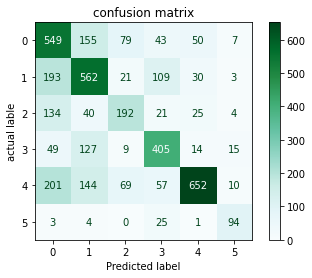

In [25]:
from sklearn.metrics import plot_confusion_matrix
cmd=plot_confusion_matrix(knn,x_test,y_test,display_labels=['0','1','2','3','4','5'],cmap=plt.cm.BuGn,normalize=None)
plt.title("confusion matrix")
plt.ylabel("actual lable")


Text(0, 0.5, 'actual lable')

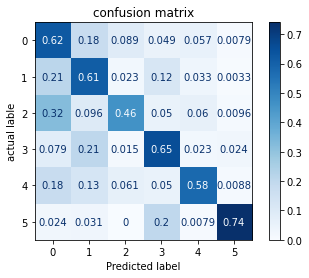

In [26]:
from sklearn.metrics import plot_confusion_matrix
cmd=plot_confusion_matrix(knn,x_test,y_test,display_labels=['0','1','2','3','4','5'],cmap=plt.cm.Blues,normalize="true")
plt.title("confusion matrix")
plt.ylabel("actual lable")

In [27]:
#SVM model devolopment
from sklearn import svm
svc=svm.SVC()

In [28]:
svc.fit(x_train,y_train)

SVC()

In [29]:
#check the model performance
svc.score(x_test,y_test)

0.38671875

In [30]:
svc_prediction=svc.predict(x_test)


In [31]:
#print the classsification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,svc_prediction))

              precision    recall  f1-score   support

      Cramps       0.32      0.37      0.35       883
     Falling       0.44      0.29      0.35       918
     Running       0.00      0.00      0.00       416
     Sitting       0.40      0.31      0.35       619
    Standing       0.40      0.70      0.51      1133
     Walking       0.00      0.00      0.00       127

    accuracy                           0.39      4096
   macro avg       0.26      0.28      0.26      4096
weighted avg       0.34      0.39      0.35      4096



In [32]:
#model visualization
#total number of instances 
y_test.value_counts()

ACTIVITY
Standing    1133
Falling      918
Cramps       883
Sitting      619
Running      416
Walking      127
dtype: int64

In [33]:
#visualize using confusion metrics
from sklearn.metrics import confusion_matrix
y_pred=svc.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[330,  89,   0,  75, 389,   0],
       [217, 266,   0,  88, 347,   0],
       [156,  43,   0,  45, 172,   0],
       [123, 107,   0, 191, 198,   0],
       [194, 101,   0,  41, 797,   0],
       [  5,   5,   0,  38,  79,   0]])

Text(0, 0.5, 'actual lable')

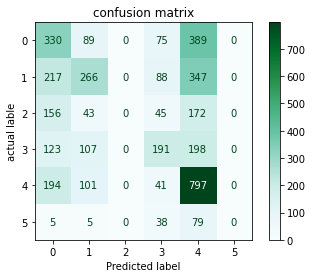

In [34]:
from sklearn.metrics import plot_confusion_matrix
cmd=plot_confusion_matrix(svc,x_test,y_test,display_labels=['0','1','2','3','4','5'],cmap=plt.cm.BuGn,normalize=None)
plt.title("confusion matrix")
plt.ylabel("actual lable")


Text(0, 0.5, 'actual lable')

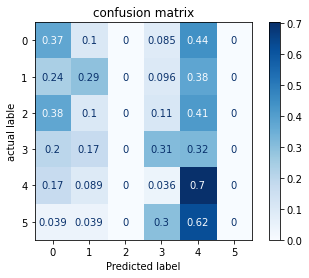

In [35]:
from sklearn.metrics import plot_confusion_matrix
cmd=plot_confusion_matrix(svc,x_test,y_test,display_labels=['0','1','2','3','4','5'],cmap=plt.cm.Blues,normalize="true")
plt.title("confusion matrix")
plt.ylabel("actual lable")